#### [ 산점도 그래프 ]
- 두개의 컬럼 (변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [11]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용한 폰트 파일
FONT_FILE=r'C:\Windows\Fonts\malgun.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

In [13]:
# [2] 데이터 준비
F_DATA=r'C:\Users\KDP-27\Desktop\KDT6\EX_PANDAS06\DAY04_0716\auto_mpg.csv'

In [14]:
# [3] CSV => DataFrame으로 저장
dataDF= pd.read_csv(F_DATA)

In [15]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [16]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2), corrSR


(-0.83,
 mpg             1.000000
 cylinders      -0.775396
 displacement   -0.804203
 weight         -0.831741
 acceleration    0.420289
 model year      0.579267
 origin          0.563450
 Name: mpg, dtype: float64)

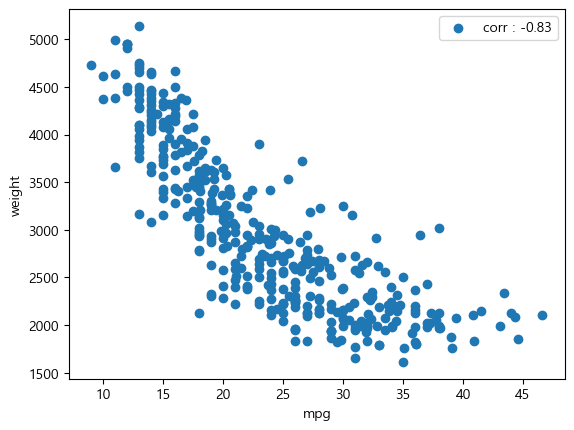

In [17]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg, dataDF.weight, label=f'corr : {round(corrSR["weight"],2)}')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()


In [18]:
sourcelist=corrSR.index.to_list()

Text(0.5, 0, 'mpg')

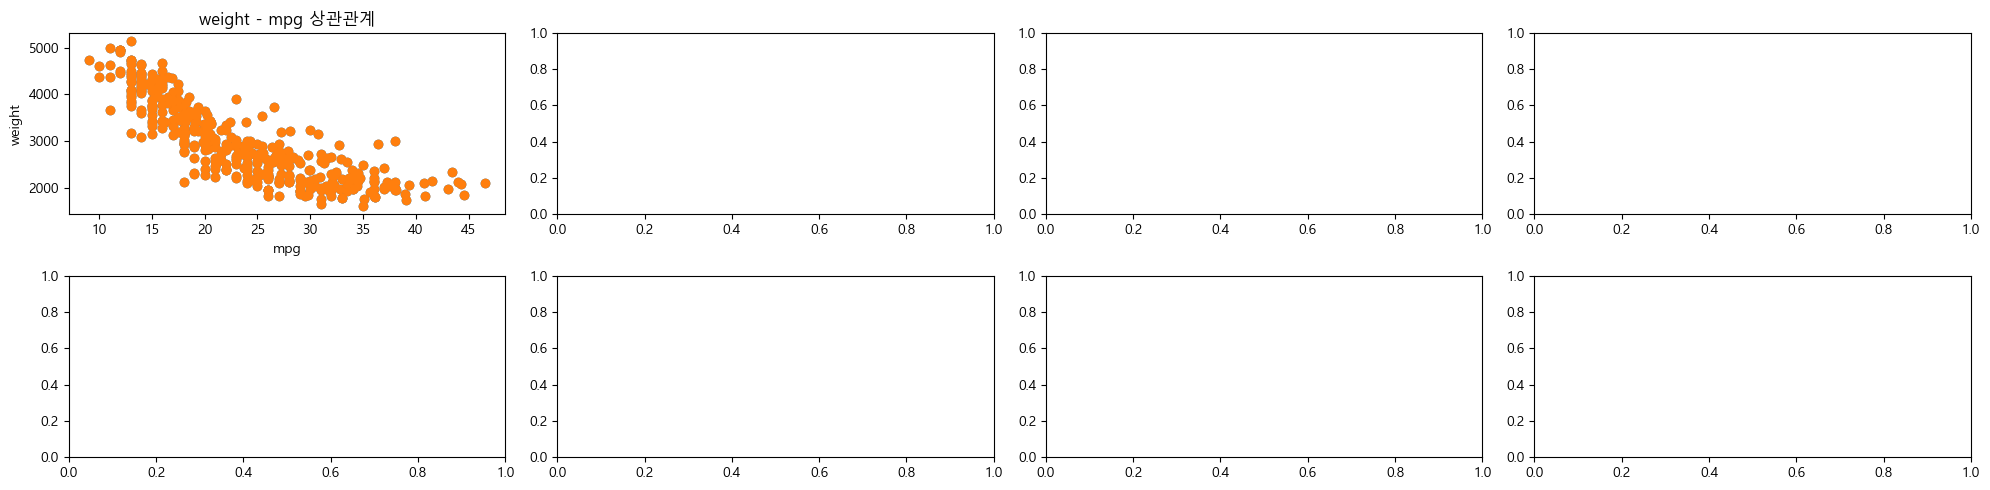

In [20]:
fig=plt.figure(figsize=(20, 5), tight_layout=True)
[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]]=fig.subplots(2,4)

ax1.scatter(dataDF.mpg, dataDF.weight, label=f'corr : {round(corrSR["weight"],2)}')
ax1.set_title(f'weight - mpg 상관관계')
ax1.set_ylabel('weight')
ax1.set_xlabel('mpg')


ax1.scatter(dataDF.mpg, dataDF.weight, label=f'corr : {round(corrSR["weight"],2)}')
ax1.set_title(f'weight - mpg 상관관계')
ax1.set_ylabel('weight')
ax1.set_xlabel('mpg')


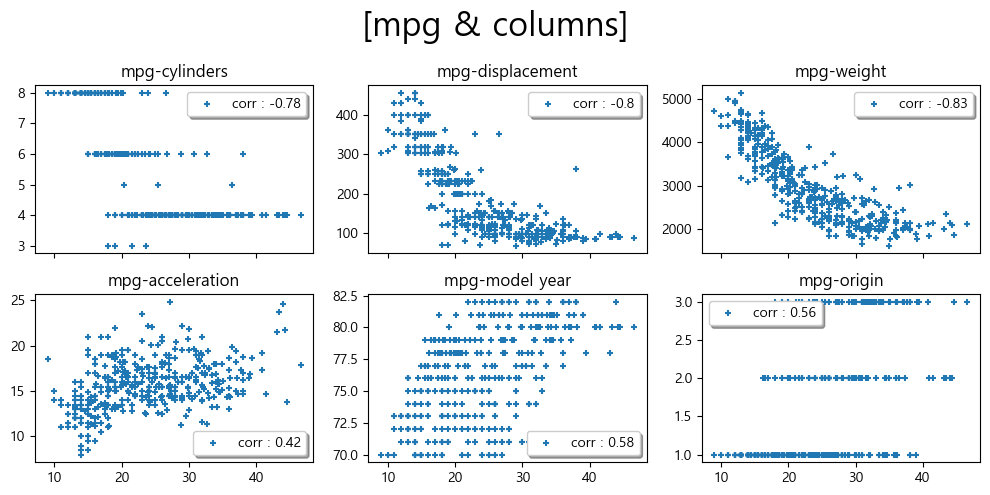

In [21]:
# ---------------선생님-----------------------
# - [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=(10,5), tight_layout=True)

# - (2) 그래프 담을 공간 생성 axes
axs= fig.subplots(2,3, sharex=True)
# axs[0,0].scatter(dataDF['mpg'], dataDF['mpg'])
for row in range(2):
    for col in range(3):
        #axs[row,col].scatter(dataDF['mpg'], dataDF[corrSR.index[idx+1]])
        col_name=corrSR.index[row*3+col+1]
        axs[row, col].scatter(dataDF['mpg'], dataDF[col_name], 
                              label=f'corr : {round(corrSR[col_name],2)}', s=25, marker='+')
        axs[row,col].set_title(f'mpg-{col_name}')
        axs[row,col].legend(shadow=True)
fig.suptitle("[mpg & columns]", fontsize=24)
plt.show()

In [22]:
axs[0]

array([<Axes: title={'center': 'mpg-cylinders'}>,
       <Axes: title={'center': 'mpg-displacement'}>,
       <Axes: title={'center': 'mpg-weight'}>], dtype=object)

In [23]:
corrSR['weight'], corrSR.iloc[3]

(-0.8317409332443344, -0.8317409332443344)

- [5] 연비와 무게, 실린더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관관계가 높음
    * 연비와 실린더 개수도 반비례 관계에 있음


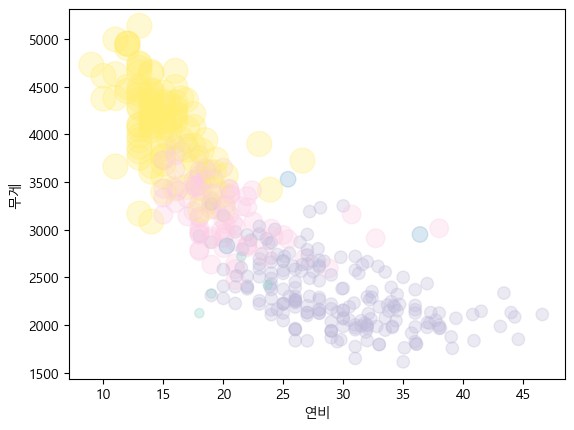

In [38]:
#   - mpg와 weight 관계 산점도(scatter)시각화
plt.scatter(dataDF['mpg'],dataDF['weight'],
            s=dataDF['cylinders']**2*5, #사이즈
            c=dataDF['cylinders'],
            cmap='Set3',# 색상
            alpha=0.3) # 투명도
plt.xlabel('연비')
plt.ylabel('무게')
plt.show()